In [133]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Length of period:
len_period = 4200 # mm

# Load data from output txt file:
# file = 'AllTracks_ref.txt' # 200 MeV/c'
file = 'AllTracks.txt'
# file = 'AllTracks_test.txt'
data = np.loadtxt(file)

# Figure directory:
fig_dir = 'Figures/'

In [134]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []; mod_t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
next_z = 500; period_start_z_vals = []; period_start_indices = [] # start solenoid placement at 500mm
for i in range(data.shape[0]):
    x_vals.append(data[i][0]) # mm
    y_vals.append(data[i][1])
    z = data[i][2]
    z_vals.append(z)
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    t = data[i][6]
    t_vals.append(t) # ns
    mod_t = t % T
    mod_t_vals.append(mod_t)
    Bx = data[i][12]; By = data[i][13]; Bz = data[i][14]
    # Bx = data[i][12]*200; By = data[i][13]*200; Bz = data[i][14] # rescale Bx, By for plotting
    Bx_vals.append(Bx)
    By_vals.append(By)
    Bz_vals.append(Bz)
    del px, py, pz, t, Bx, By, Bz

    # Find indices for first value in each period:
    if z > next_z:
        period_start_z_vals.append(z)
        period_start_indices.append(i)
        next_z += len_period

# Remove last period -- just for reducing end field effects:
start_last_period = period_start_indices[len(period_start_indices)-1]
x_vals = x_vals[:start_last_period]
y_vals = y_vals[:start_last_period]
z_vals = z_vals[:start_last_period]
px_vals = px_vals[:start_last_period]
py_vals = py_vals[:start_last_period]
pz_vals = pz_vals[:start_last_period]
ptotal_vals = ptotal_vals[:start_last_period]
Bx_vals = Bx_vals[:start_last_period]
By_vals = By_vals[:start_last_period]
Bz_vals = Bz_vals[:start_last_period]

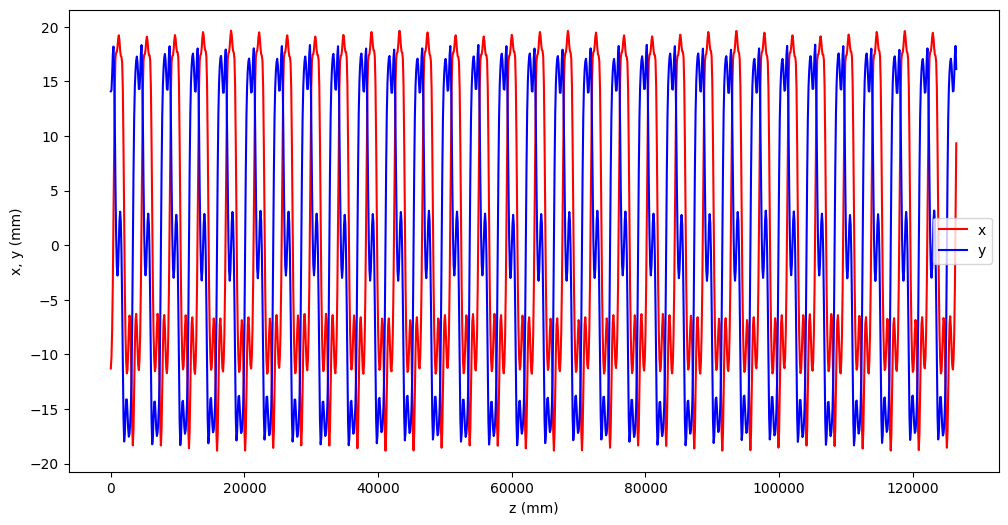

In [135]:
# Plot x, y along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
plt.xlabel('z (mm)')
plt.ylabel('x, y (mm)')
plt.legend()
plt.show()

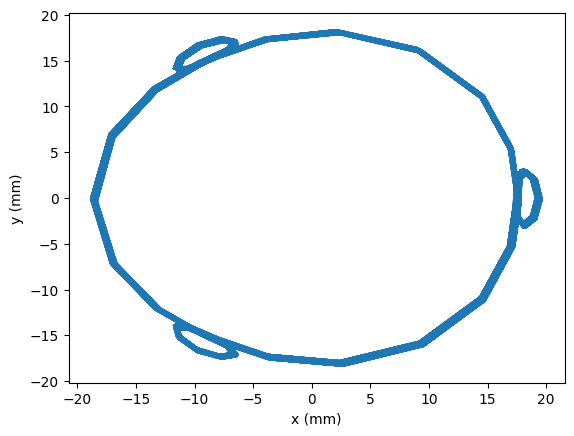

In [136]:
# Plot projection in x-y plane:
plt.figure()
plt.plot(x_vals,y_vals)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

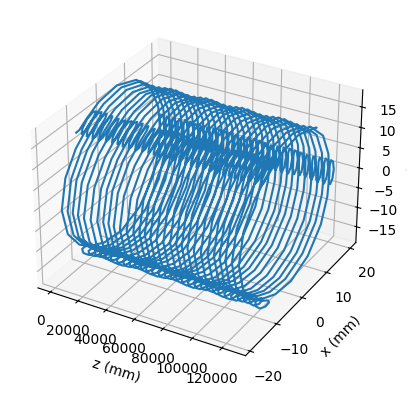

In [137]:
# 3D plot of trajectory:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_vals,x_vals,y_vals)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
plt.show()

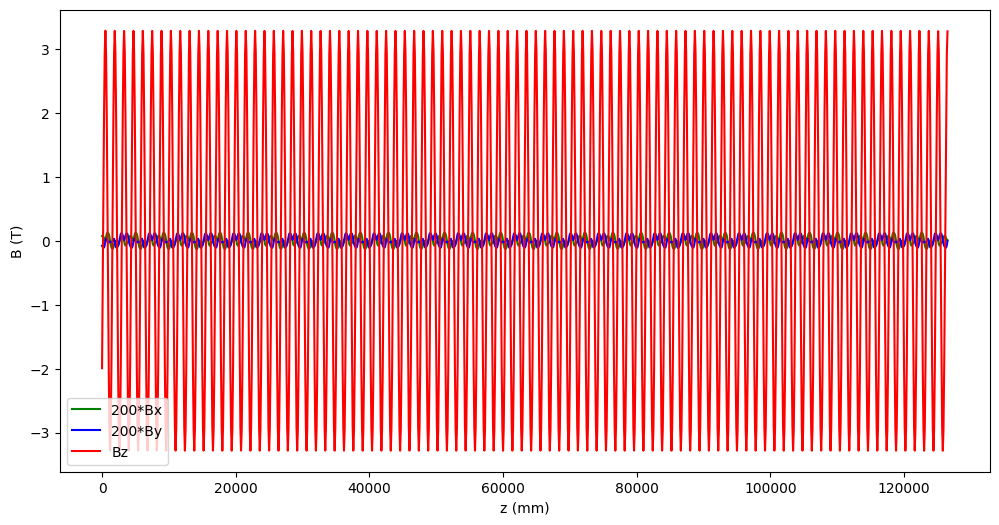

In [138]:
# Plot magnetic field along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,Bx_vals,color='green',label='200*Bx')
plt.plot(z_vals,By_vals,color='blue',label='200*By')
plt.plot(z_vals,Bz_vals,color='red',label='Bz')
plt.xlabel('z (mm)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

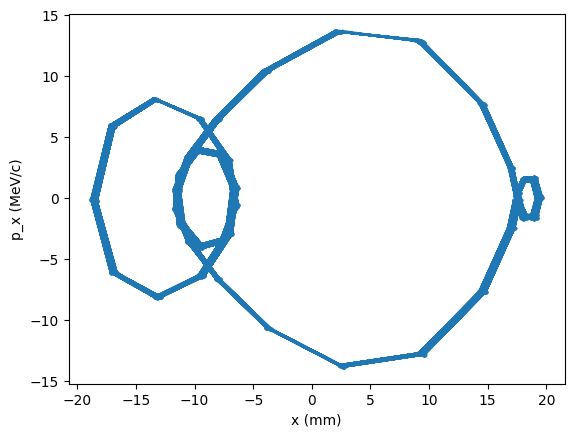

In [139]:
# Plot phase space trajectory (x):
plt.figure()
plt.scatter(x_vals,px_vals,s=3)
plt.plot(x_vals,px_vals)
plt.xlabel('x (mm)')
plt.ylabel('p_x (MeV/c)')
plt.show()

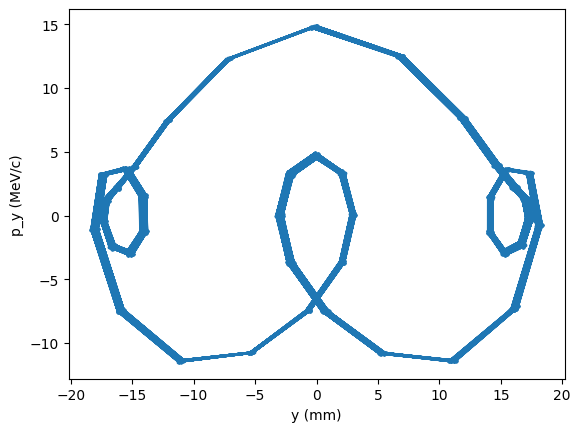

In [140]:
# Plot phase space trajectory (y):
plt.figure()
plt.scatter(y_vals,py_vals,s=3)
plt.plot(y_vals,py_vals)
plt.xlabel('y (mm)')
plt.ylabel('p_y (MeV/c)')
plt.show()

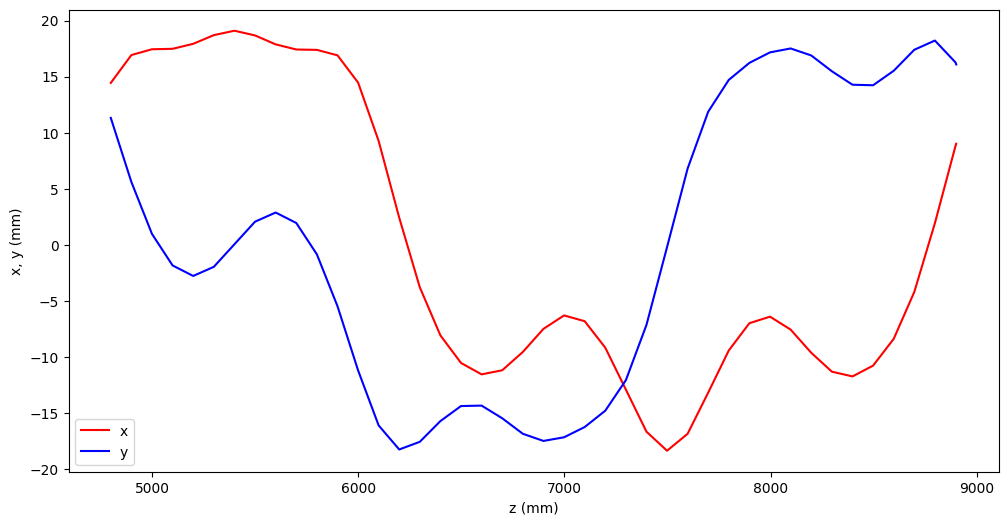

In [141]:
# Plot trajectory for second period only:
plt.figure(figsize = (12,6))
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],x_vals[period_start_indices[1]:period_start_indices[2]],color='red',label='x')
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],y_vals[period_start_indices[1]:period_start_indices[2]],color='blue',label='y')
plt.xlabel('z (mm)')
plt.ylabel('x, y (mm)')
plt.legend()
plt.show()

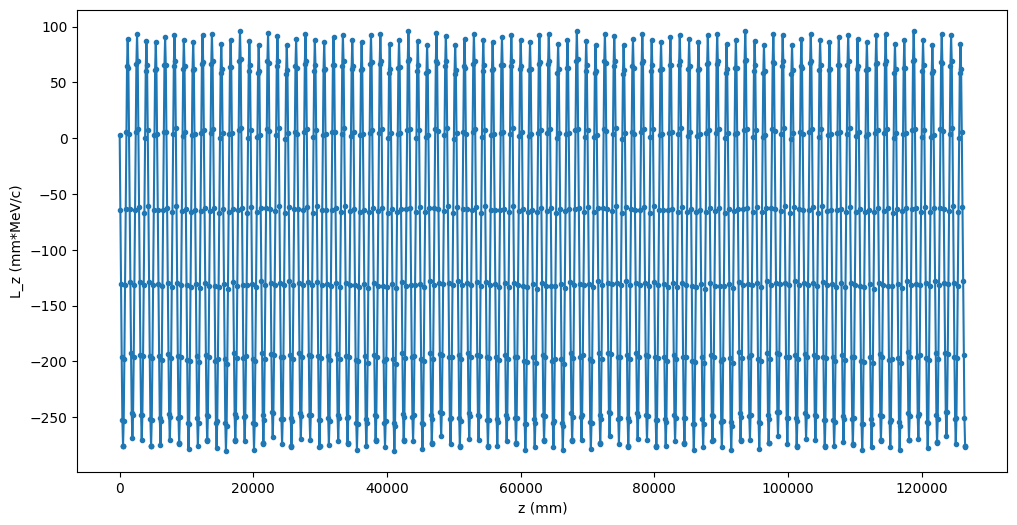

In [142]:
# Plot angular momentum:
# %matplotlib widget
Lz_vals = []
for i in range(len(z_vals)):
    Lz = x_vals[i]*py_vals[i]-y_vals[i]*px_vals[i]
    Lz_vals.append(Lz)
plt.figure(figsize = (12,6))
plt.plot(z_vals,Lz_vals,marker='.')
plt.xlabel('z (mm)')
plt.ylabel('L_z (mm*MeV/c)')
plt.show()

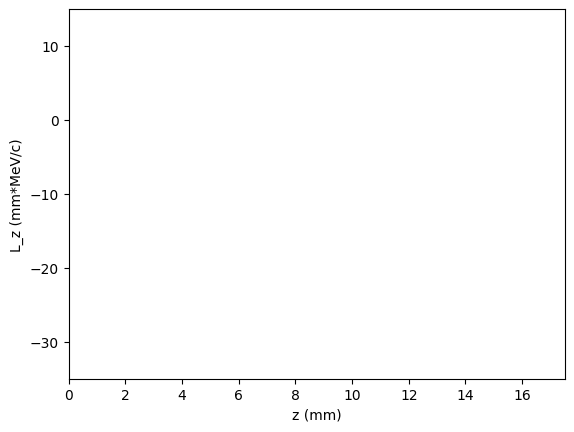

In [143]:
# Animation of Lz along z:
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
def animate(frame):
    plt.plot(z_vals[:frame],Lz_vals[:frame],color='green')
    plt.xlim((0,17.5))
    plt.ylim((-35,15))
    plt.ylabel('L_z (mm*MeV/c)')
    plt.xlabel('z (mm)')
animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, repeat=True)
# animation.save(fig_dir+'Lz_animation.gif', writer='pillow')

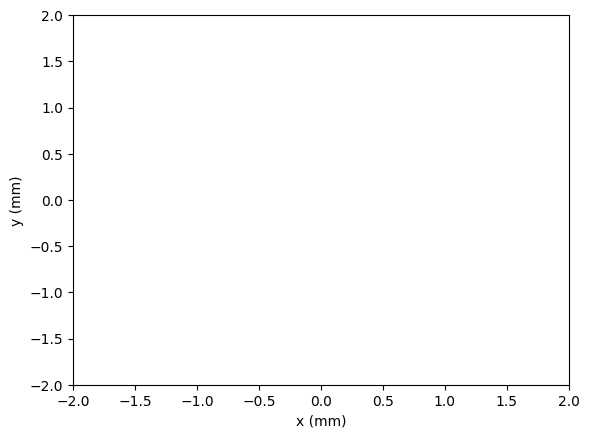

In [144]:
# Animation of trajectory in xy-plane along z:
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
def animate(frame):
    plt.plot(x_vals[:frame],y_vals[:frame],color='green')
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, repeat=True)
# animation.save(fig_dir+'xy_animation.gif', writer='pillow')

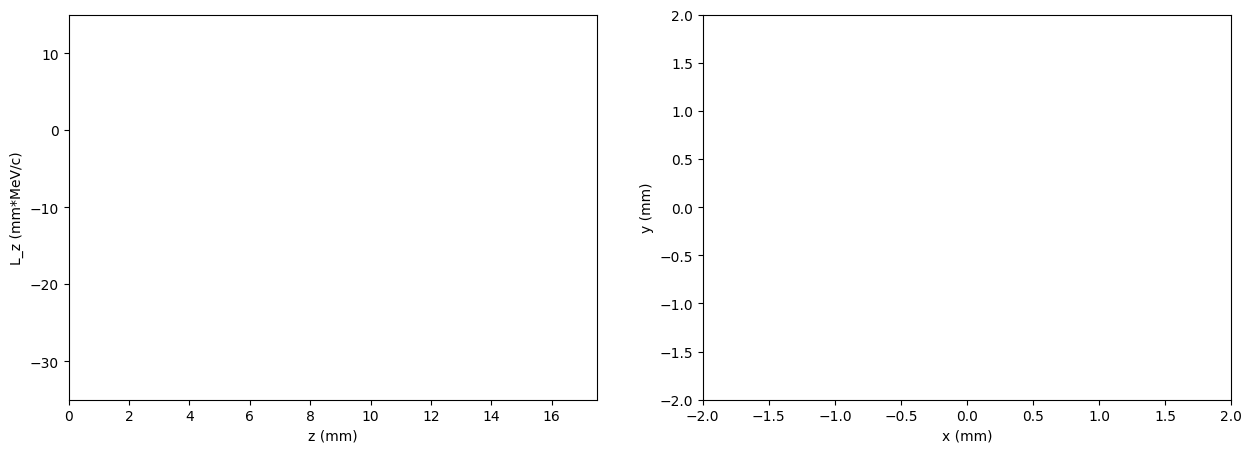

In [145]:
# Animation of xy trajectory and Lz along z:
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # Lz plot:
    ax1.plot(z_vals[:frame],Lz_vals[:frame],color='green')
    ax1.set_xlim((0,17.5))
    ax1.set_ylim((-35,15))
    ax1.set_ylabel('L_z (mm*MeV/c)')
    ax1.set_xlabel('z (mm)')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='green')
    ax2.set_xlim((-2,2))
    ax2.set_ylim((-2,2))
    ax2.set_xlabel('x (mm)')
    ax2.set_ylabel('y (mm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, repeat=True)
# animation.save(fig_dir+'Lz_and_xy_animation.gif', writer='pillow')

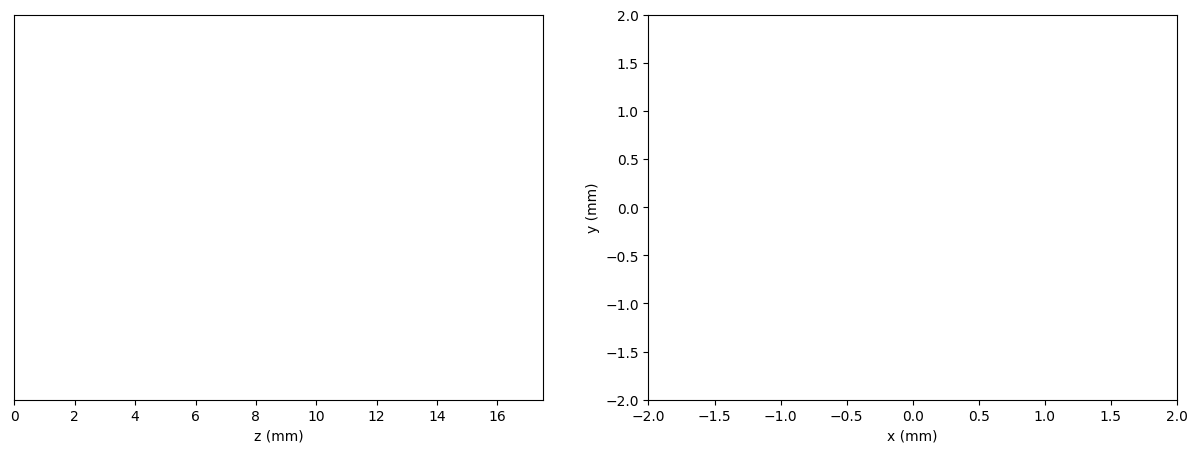

In [146]:
# Animation of xy trajectory and z vs. t (to visualize timing with lattice elements):
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # z plot:
    vals = np.zeros(frame)
    ax1.plot(z_vals[:frame],vals,color='green')
    ax1.set_xlim((0,17.5))
    ax1.set_ylim((-1,1))
    ax1.set_yticks([])
    ax1.set_xlabel('z (mm)')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='green')
    ax2.set_xlim((-2,2))
    ax2.set_ylim((-2,2))
    ax2.set_xlabel('x (mm)')
    ax2.set_ylabel('y (mm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, repeat=True)
# animation.save(fig_dir+'z_and_xy.gif', writer='pillow')

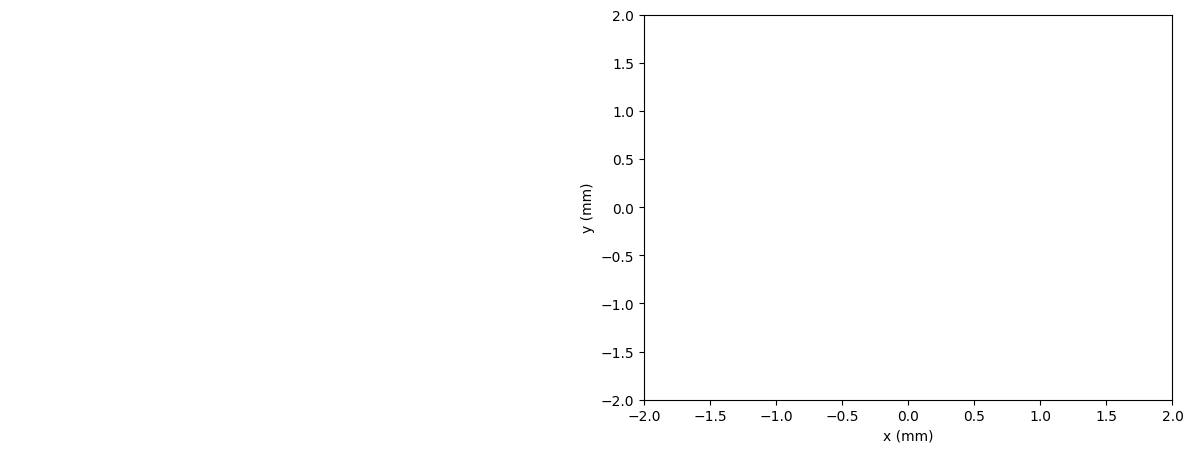

In [147]:
# Animation of trajectory in yz- and xy-planes (to visualize timing with lattice elements):
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # y,z plot:
    ax1.plot(z_vals[:frame],y_vals[:frame],color='green')
    ax1.set_xlim((0,4.2))
    ax1.set_ylim((-50,50))
    ax1.set_ylabel('y (mm)')
    ax1.set_xlabel('z (mm)')
    ax1.axis('off')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='green')
    ax2.set_xlim((-2,2))
    ax2.set_ylim((-2,2))
    ax2.set_xlabel('x (mm)')
    ax2.set_ylabel('y (mm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
# animation.save(fig_dir+'yz_and_xy.gif', writer='pillow')

In [148]:
# Generate mu minus orbit:
start = int( (period_start_indices[1] - period_start_indices[0]) /2 )
end = period_start_indices[1] + start
minus_x = x_vals[start:end]
minus_y = y_vals[start:end]

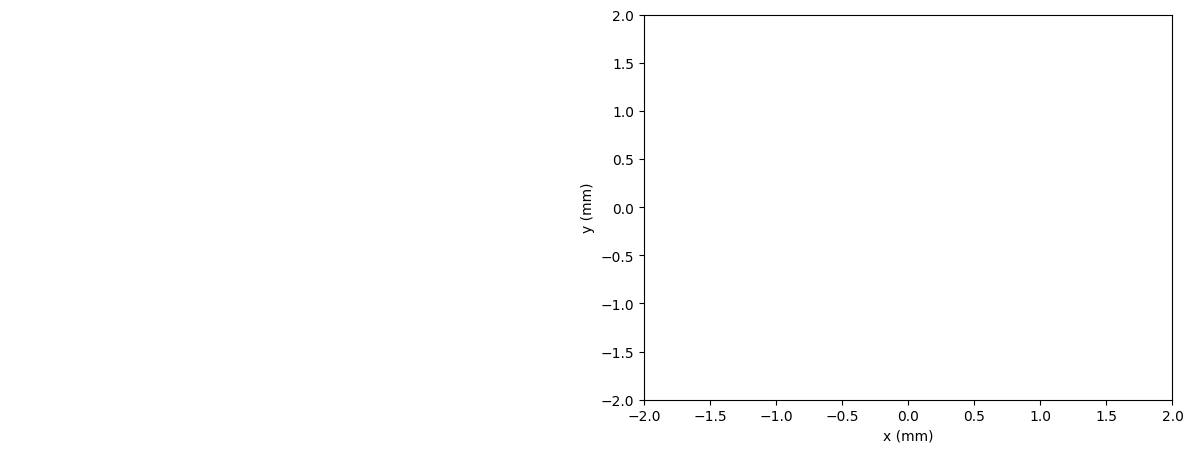

In [150]:
# Animation of trajectory in yz- and xy-planes for both signs:
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sol_placements = np.arange(z_vals[period_start_indices[0]],z_vals[period_start_indices[1]+2],0.7)
def animate(frame):

    if frame == 0:
        for i in range(len(sol_placements)):
            ax1.axvline(sol_placements[i],color='grey',linestyle='--',linewidth=0.3)

    # y,z plot:
    ax1.plot(z_vals[:frame],y_vals[:frame],color='blue')
    ax1.set_xlim((0,4.2))
    ax1.set_ylim((-50,50))
    ax1.set_ylabel('y (mm)')
    ax1.set_xlabel('z (mm)')
    ax1.axis('off')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='blue') # mu plus
    ax2.plot(minus_x[:frame],minus_y[:frame],color='red') # mu minus
    ax2.set_xlim((-2,2))
    ax2.set_ylim((-2,2))
    ax2.set_xlabel('x (mm)')
    ax2.set_ylabel('y (mm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
# animation.save(fig_dir+'yz_and_xy_both_signs.gif', writer='pillow')

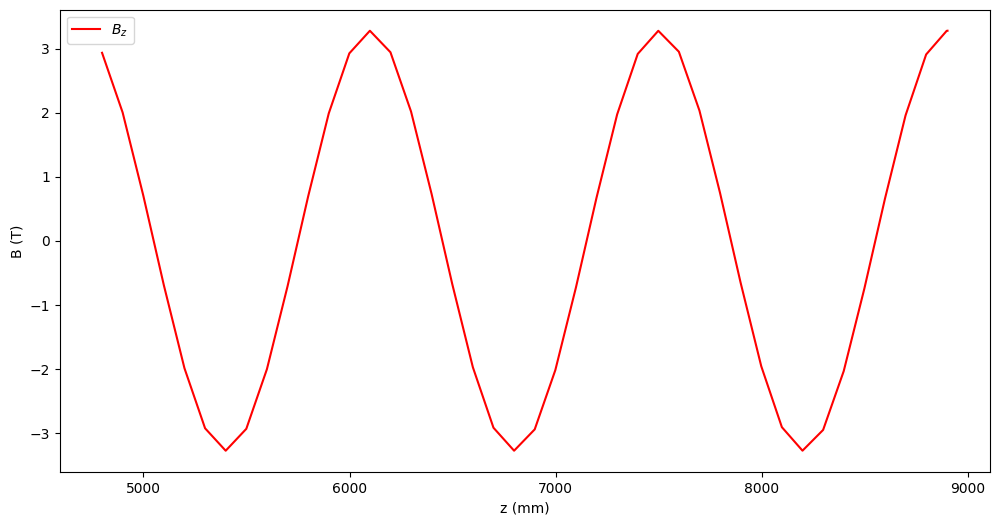

In [151]:
# Plot Bz:
start = period_start_indices[1]
end = period_start_indices[2]
plt.figure(figsize = (12,6))
plt.plot(z_vals[start:end],Bz_vals[start:end],color='red',label='$B_z$')
plt.xlabel('z (mm)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

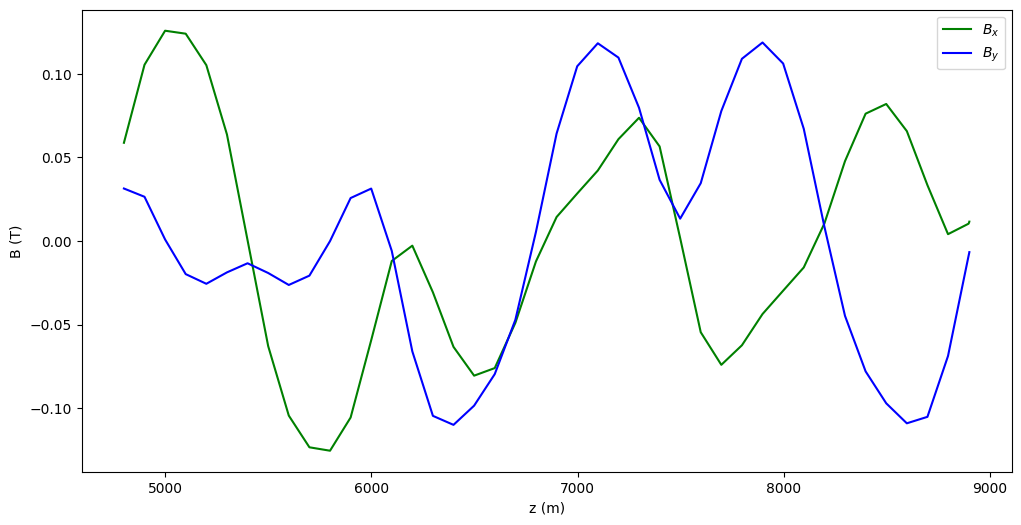

In [152]:
# Plot Bx, By:
plt.figure(figsize = (12,6))
plt.plot(z_vals[start:end],Bx_vals[start:end],color='green',label='$B_x$')
plt.plot(z_vals[start:end],By_vals[start:end],color='blue',label='$B_y$')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

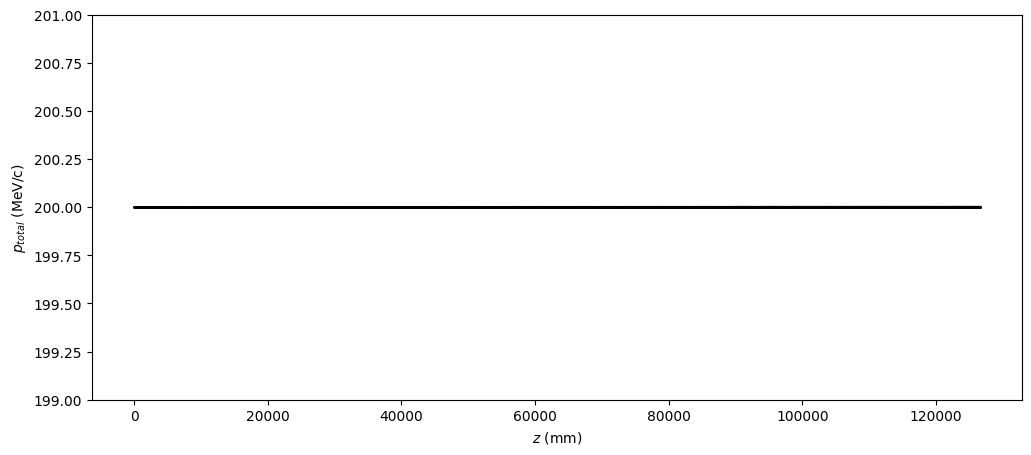

In [156]:
# Plot p_total vs. z:
plt.figure(figsize=(12,5))
plt.scatter(z_vals,ptotal_vals,color='black',s=1)
plt.plot(z_vals,ptotal_vals,color='black',alpha=0.5)
plt.ylim(199,201)
plt.xlabel('$z$ (mm)')
plt.ylabel('$p_{total}$ (MeV/c)')
plt.show()

In [157]:
# Calculate phase advance:
p = 200e-3 # GeV
m = 105.7e-3 # GeV
e = 0.303
gamma = np.sqrt(1+(p/m)**2)
beta = p/m/gamma
peak_Bz = np.max(Bz_vals)
phi = e*peak_Bz/(2*m*gamma*beta) # rad
phi = phi*180/np.pi # --> deg
print(f'phi = {phi}')

phi = 142.4642956140678
